In this notebook we make models for clusters with unimodal fire season using the delta time series.

We use the functions defined in the file "scripts/modelling_functions_new.R".

In [1]:
setwd("..")

In [2]:
source("scripts/modelling_functions_new.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews(

In [3]:
# Data required
library('ggplot2')
load('fireSeasonPer75_def.Rdata', verbose = T)
load("data/ba_mon_time_series_masked.Rdata", verbose = T)
load("data/ba_mon_clim_masked_df.Rdata", verbose = T)
load('corrDfDeltaAnnualClus.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag1.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag2.Rdata', verbose = T)
load('corrDfDeltaAnnualClusLag3.Rdata', verbose = T)

Loading objects:
  fireSeasonPer75_def
Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  df_masked
  masked_coords
Loading objects:
  corr.df.delta
Loading objects:
  corr.df.delta.1
Loading objects:
  corr.df.delta.2
Loading objects:
  corr.df.delta.3


## Climate indexes data loading

In [4]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

In [5]:
nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [6]:
poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [7]:
ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [8]:
eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [9]:
pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [10]:
scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [11]:
wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

# Linear models for some particular clusters

A high RMSE does not always mean a bad model performance

## Biome 2, cluster 4, no persistence

       RMSE     bias      RVar  cor.pvalue       cor       acc    acc.t1
cor 1645.89 6.342544 0.6090327 0.002455416 0.6678372 0.6111111 0.6666667
       acc.t2 acc.t3
cor 0.6666667    0.5


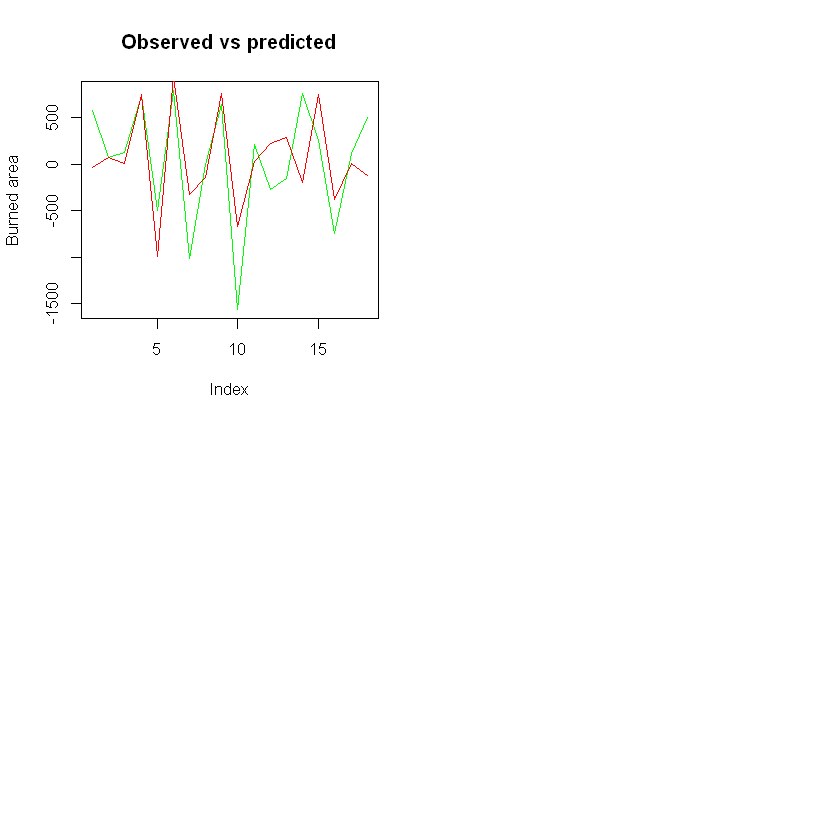

In [12]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df.delta, 
                 list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 2, 3, useDeltas = T)

## Biome 1, cluster 7, no persistence

        RMSE     bias      RVar cor.pvalue       cor       acc acc.t1    acc.t2
cor 1308.469 0.870565 0.3591333 0.09382885 0.4068374 0.3333333    0.5 0.1666667
       acc.t3
cor 0.3333333


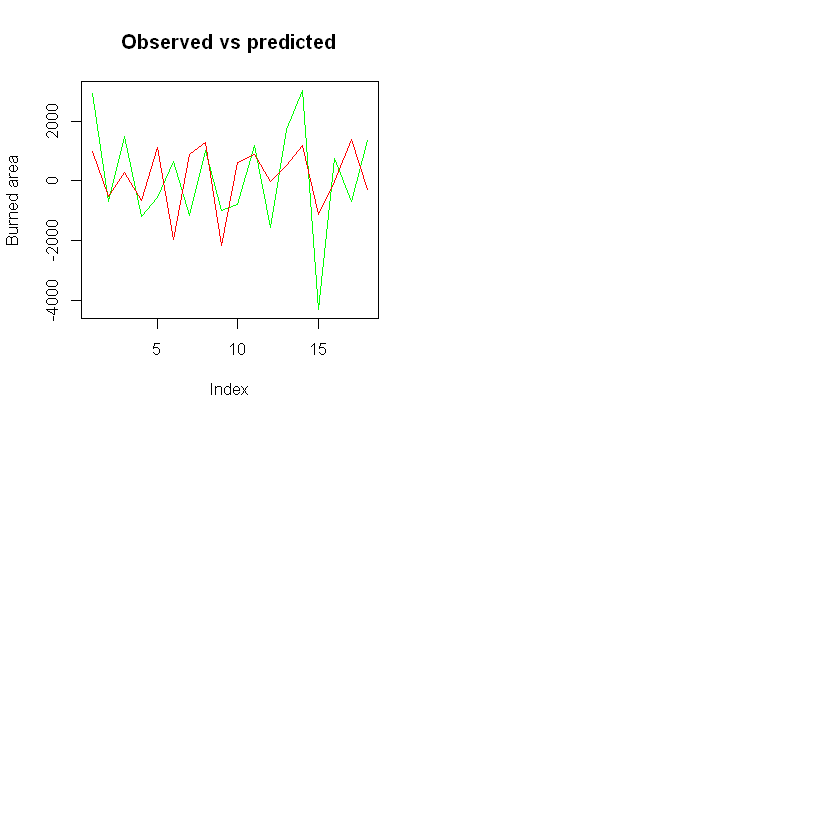

In [13]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df.delta, 
                 list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 1, 7, useDeltas = T)

## Biome 5, cluster 1, no persistence

        RMSE     bias      RVar  cor.pvalue      cor       acc acc.t1 acc.t2
cor 2270.275 21.50346 0.6394687 0.005742615 0.639126 0.5882353    0.5    0.4
       acc.t3
cor 0.8333333


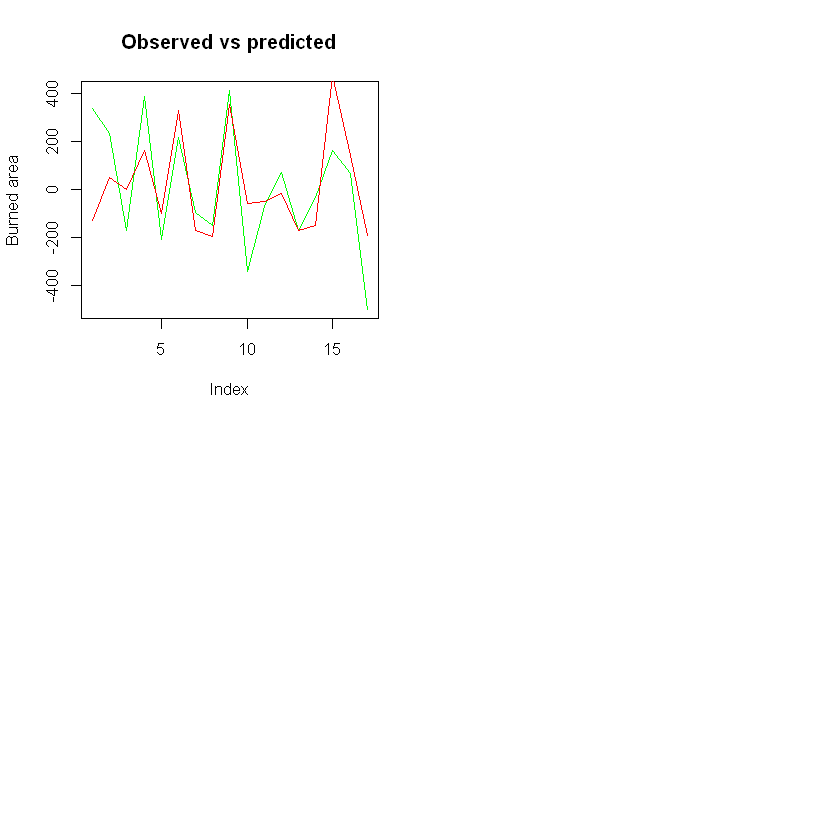

In [14]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df.delta, 
                 list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 5, 1, useDeltas = T)

# Models with no persistence

In [12]:
lm.list <- lm.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df.delta, 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', useDeltas = T)
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,3,749.1626,0.7358777,0.5034432,0.082760227,0.4199134,0.3333333,0.5000000,0.1666667,0.3333333
3,1,2,3,1060.0622,1.1804759,0.5529520,0.009843733,0.5907111,0.6111111,0.6666667,0.5000000,0.6666667
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,2,781.3551,0.3598807,0.6145972,0.001623450,0.6873124,0.5000000,0.5000000,0.3333333,0.6666667
8,1,7,1,1308.4693,0.8705650,0.3591333,0.093828847,0.4068374,0.3333333,0.5000000,0.1666667,0.3333333
9,1,8,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,1,9,2,911.2257,0.4705580,0.3907031,0.084254839,0.4180761,0.5000000,0.6666667,0.3333333,0.5000000
11,1,10,2,962.2227,0.4821645,0.6356550,0.001488861,0.6759363,0.5789474,0.6666667,0.3333333,0.7142857


In [13]:
rf.list <- rf.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df.delta, 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', useDeltas = T)
rf.list$results

,biome,cluster,rf.Ntree,rf.RMSE,rf.bias,rf.RVar,rf.cor.pvalue,rf.cor,rf.acc,rf.acc.t1,rf.acc.t2,rf.acc.t3
2,1,1,20,740.9574,0.63594231,0.12143724,0.171810073,0.336741254,0.2777778,0.6666667,0.0000000,0.1666667
3,1,2,160,1124.1580,0.41850892,0.17970352,0.035286248,0.498375397,0.6111111,0.6666667,0.5000000,0.6666667
4,1,3,180,904.7588,1.25425533,0.16236226,0.769344398,0.074358174,0.3888889,0.3333333,0.3333333,0.5000000
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,10,990.5616,0.14941690,0.14440745,0.126983221,0.373356662,0.4444444,0.5000000,0.3333333,0.5000000
8,1,7,20,1434.2952,1.03220695,0.04537222,0.989246408,-0.003422526,0.2777778,0.3333333,0.1666667,0.3333333
9,1,8,10,1914.4889,0.04318566,0.08048981,0.728941326,0.087825941,0.3333333,0.3333333,0.3333333,0.3333333
10,1,9,160,931.9362,0.41121436,0.11042763,0.220082740,0.303965232,0.3333333,0.5000000,0.1666667,0.3333333
11,1,10,140,952.0793,0.74058644,0.26151497,0.000770722,0.703849005,0.4736842,0.8333333,0.1666667,0.4285714


In [14]:
knn.list <- knn.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, corr.df.delta, 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', useDeltas = T)
knn.list$results

,biome,cluster,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,1066.4974,1.77131884,1.5251974,0.25920625,0.28069648,0.2222222,0.3333333,0.1666667,0.1666667
3,1,2,1839.9286,-3.29177303,0.9372088,0.95361307,0.01477060,0.3888889,0.1666667,0.6666667,0.3333333
4,1,3,1266.8107,0.07758456,1.1879600,0.96734735,0.01039464,0.1111111,0.1666667,0.0000000,0.1666667
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,1209.4764,1.07752361,0.8655176,0.17125578,0.33715135,0.5000000,0.5000000,0.3333333,0.6666667
8,1,7,1869.3691,4.80394904,0.6930703,0.92609669,0.02355088,0.2222222,0.3333333,0.0000000,0.3333333
9,1,8,2892.2530,3.18680776,1.1948884,0.79713601,-0.06520535,0.2777778,0.1666667,0.3333333,0.3333333
10,1,9,854.1620,0.51627557,0.9131021,0.00816607,0.60230263,0.6666667,0.8333333,0.5000000,0.6666667
11,1,10,1437.1692,0.18362362,0.9551255,0.12540709,0.36409465,0.3684211,0.3333333,0.0000000,0.7142857


In [15]:
table = cbind(lm.list$results, rf.list$results[,-c(1,2)], knn.list$results[,-c(1,2)])
table

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,...,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,3,749.1626,0.7358777,0.5034432,0.082760227,0.4199134,0.3333333,0.5000000,...,0.1666667,1066.4974,1.77131884,1.5251974,0.25920625,0.28069648,0.2222222,0.3333333,0.1666667,0.1666667
3,1,2,3,1060.0622,1.1804759,0.5529520,0.009843733,0.5907111,0.6111111,0.6666667,...,0.6666667,1839.9286,-3.29177303,0.9372088,0.95361307,0.01477060,0.3888889,0.1666667,0.6666667,0.3333333
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,...,0.5000000,1266.8107,0.07758456,1.1879600,0.96734735,0.01039464,0.1111111,0.1666667,0.0000000,0.1666667
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,2,781.3551,0.3598807,0.6145972,0.001623450,0.6873124,0.5000000,0.5000000,...,0.5000000,1209.4764,1.07752361,0.8655176,0.17125578,0.33715135,0.5000000,0.5000000,0.3333333,0.6666667
8,1,7,1,1308.4693,0.8705650,0.3591333,0.093828847,0.4068374,0.3333333,0.5000000,...,0.3333333,1869.3691,4.80394904,0.6930703,0.92609669,0.02355088,0.2222222,0.3333333,0.0000000,0.3333333
9,1,8,0,NA,NA,NA,NA,NA,NA,NA,...,0.3333333,2892.2530,3.18680776,1.1948884,0.79713601,-0.06520535,0.2777778,0.1666667,0.3333333,0.3333333
10,1,9,2,911.2257,0.4705580,0.3907031,0.084254839,0.4180761,0.5000000,0.6666667,...,0.3333333,854.1620,0.51627557,0.9131021,0.00816607,0.60230263,0.6666667,0.8333333,0.5000000,0.6666667
11,1,10,2,962.2227,0.4821645,0.6356550,0.001488861,0.6759363,0.5789474,0.6666667,...,0.4285714,1437.1692,0.18362362,0.9551255,0.12540709,0.36409465,0.3684211,0.3333333,0.0000000,0.7142857


In [16]:
save(table, file = 'ModelData/models_results_per_cluster_with_delta_no_persistence.Rdata')
#model.deltas.noP = list('lm' = lm.list, 'rf' = rf.list, 'knn' = knn.list)
#save(model.deltas.noP, file = 'ModelData/models_with_delta_no_persistence')

In [12]:
load('ModelData/models_results_per_cluster_with_delta_no_persistence.Rdata', verbose = T)

Loading objects:
  table


Warning message:
"Removed 157 rows containing missing values (geom_point)."

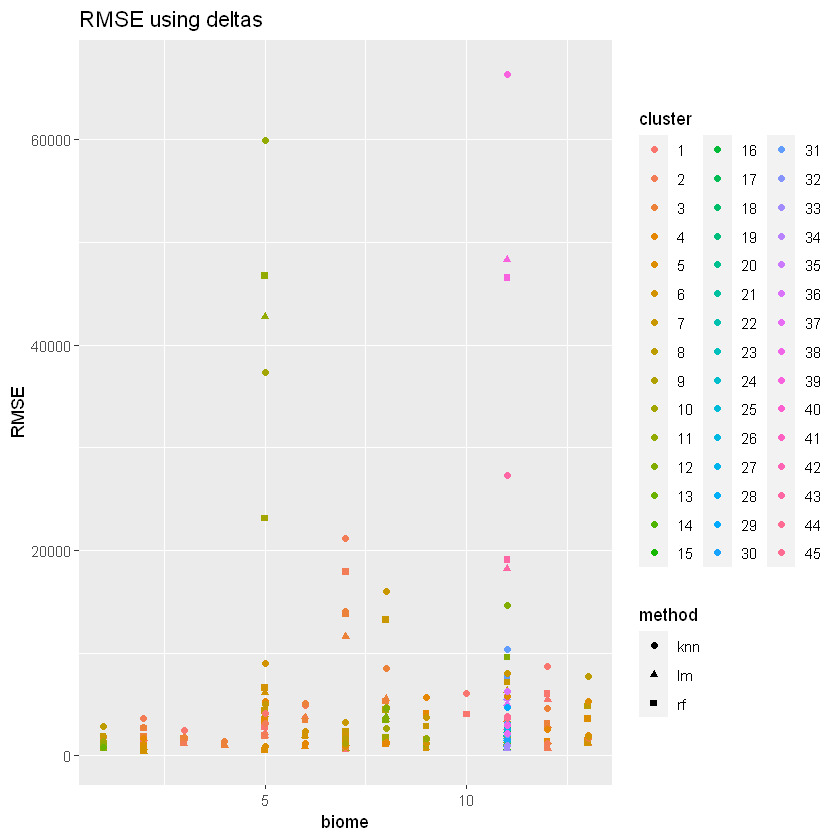

In [65]:
table.1 = table[,c(1,2,4)]
table.1$method = 'lm'
colnames(table.1)[colnames(table.1) == 'lm.RMSE'] = 'RMSE'
table.2 = table[,c(1,2,14)]
table.2$method = 'rf'
colnames(table.2)[colnames(table.2) == 'rf.RMSE'] = 'RMSE'
table.3 = table[,c(1,2,23)]
table.3$method = 'knn'
colnames(table.3)[colnames(table.3) == 'knn.RMSE'] = 'RMSE'
t = rbind(table.1, table.2, table.3)
t$method = as.factor(t$method)
t$cluster = as.factor(t$cluster)
ggplot(data = t) +
geom_point(aes(x = biome, y = RMSE, shape = method, color = cluster)) + ggtitle('RMSE using deltas')

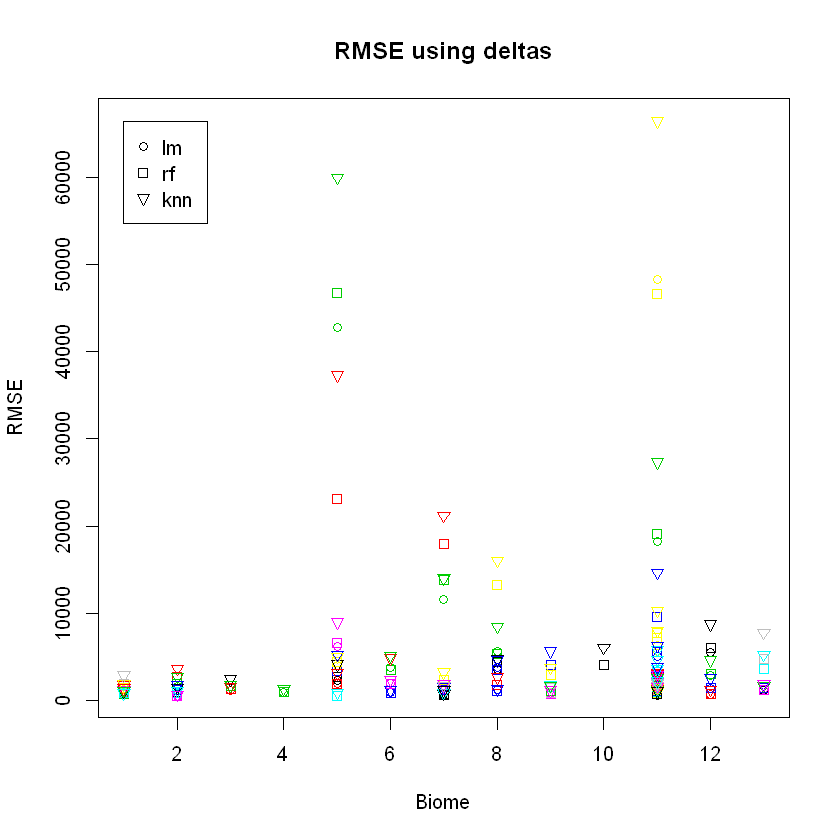

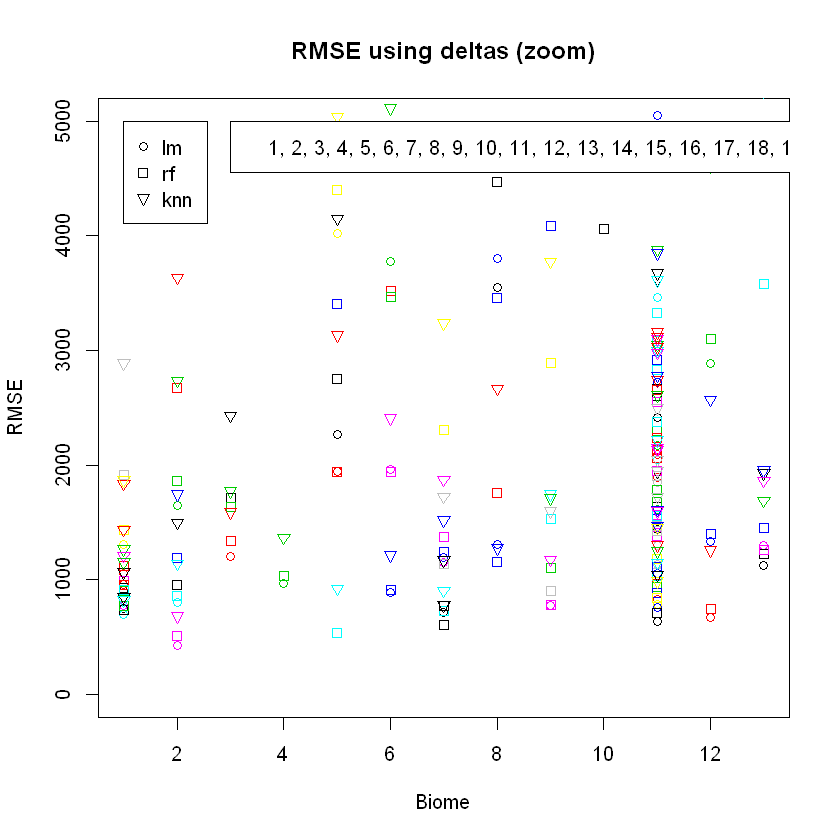

In [76]:
plot(table$biome, apply(cbind(table$lm.RMSE, table$rf.RMSE, table$knn.RMSE), 1, max, T), type = 'n', xlab = 'Biome', 
     ylab = 'RMSE', main = 'RMSE using deltas')
points(table$biome, table$lm.RMSE, pch = 1, col = table$cluster)
points(table$biome, table$rf.RMSE, pch = 0, col = table$cluster)
points(table$biome, table$knn.RMSE, pch = 6, col = table$cluster)
legend(1, max(apply(cbind(table$lm.RMSE, table$rf.RMSE, table$knn.RMSE), 1, max, T), na.rm = T), legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))

plot(table$biome, c(rep(5000, length(table$biome)-1),0), type = 'n', xlab = 'Biome', 
     ylab = 'RMSE', main = 'RMSE using deltas (zoom)')
points(table$biome, table$lm.RMSE, pch = 1, col = table$cluster)
points(table$biome, table$rf.RMSE, pch = 0, col = table$cluster)
points(table$biome, table$knn.RMSE, pch = 6, col = table$cluster)
legend(1, 5000, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))

In [20]:
# Clusters that have a linear, a random forest and a knn models
table1 <- table[-which(is.na(table$lm.RMSE)),]
table1

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,...,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,3,749.1626,7.358777e-01,0.5034432,0.082760227,0.4199134,0.3333333,0.5000000,...,0.1666667,1066.4974,1.771319e+00,1.5251974,0.259206247,0.2806964753,0.2222222,0.3333333,0.1666667,0.1666667
3,1,2,3,1060.0622,1.180476e+00,0.5529520,0.009843733,0.5907111,0.6111111,0.6666667,...,0.6666667,1839.9286,-3.291773e+00,0.9372088,0.953613072,0.0147705976,0.3888889,0.1666667,0.6666667,0.3333333
7,1,6,2,781.3551,3.598807e-01,0.6145972,0.001623450,0.6873124,0.5000000,0.5000000,...,0.5000000,1209.4764,1.077524e+00,0.8655176,0.171255776,0.3371513498,0.5000000,0.5000000,0.3333333,0.6666667
8,1,7,1,1308.4693,8.705650e-01,0.3591333,0.093828847,0.4068374,0.3333333,0.5000000,...,0.3333333,1869.3691,4.803949e+00,0.6930703,0.926096688,0.0235508811,0.2222222,0.3333333,0.0000000,0.3333333
10,1,9,2,911.2257,4.705580e-01,0.3907031,0.084254839,0.4180761,0.5000000,0.6666667,...,0.3333333,854.1620,5.162756e-01,0.9131021,0.008166070,0.6023026339,0.6666667,0.8333333,0.5000000,0.6666667
11,1,10,2,962.2227,4.821645e-01,0.6356550,0.001488861,0.6759363,0.5789474,0.6666667,...,0.4285714,1437.1692,1.836236e-01,0.9551255,0.125407094,0.3640946492,0.3684211,0.3333333,0.0000000,0.7142857
14,1,13,2,695.6622,3.579939e-01,0.6427620,0.001402165,0.6938825,0.6111111,0.6666667,...,0.5000000,822.2437,1.924735e-02,0.7231810,0.011073661,0.5831849638,0.5555556,0.5000000,0.5000000,0.6666667
18,2,3,2,1645.8899,6.342544e+00,0.6090327,0.002455416,0.6678372,0.6111111,0.6666667,...,0.5000000,2736.9058,-2.372302e+01,0.8464250,0.378130499,0.2210161304,0.3333333,0.5000000,0.1666667,0.3333333
20,2,5,1,804.4639,8.251074e-01,0.4205557,0.059473173,0.4523211,0.3888889,0.5000000,...,0.1666667,1143.7128,4.840288e-02,0.7454142,0.870785944,0.0412873208,0.2777778,0.1666667,0.1666667,0.5000000
21,2,6,1,430.8448,5.572789e-01,0.4815469,0.014586932,0.5648583,0.6111111,0.5000000,...,0.5000000,682.0690,-1.745615e-01,1.0451662,0.488139331,0.1746830137,0.4444444,0.5000000,0.5000000,0.3333333


In [21]:
colMeans(table1[,-c(1,2,3,12)])

lm.RMSE        lm.bias        lm.RVar  lm.cor.pvalue         lm.cor 
  3996.9241224    -79.9654163      0.4144638      0.1091225      0.4494315 
        lm.acc      lm.acc.t1      lm.acc.t2       rf.Ntree        rf.RMSE 
     0.4777529      0.5316092      0.3436782     76.0344828   4243.4196530 
       rf.bias        rf.RVar  rf.cor.pvalue         rf.cor         rf.acc 
  -229.2891289      0.1462819      0.3532552      0.2445097      0.4134521 
     rf.acc.t1      rf.acc.t2      rf.acc.t3       knn.RMSE       knn.bias 
     0.4454023      0.3206897      0.4729064   5711.4067532   -394.5110454 
      knn.RVar knn.cor.pvalue        knn.cor        knn.acc     knn.acc.t1 
     0.9835829      0.5149544      0.1223566      0.3420519      0.3160920 
    knn.acc.t2     knn.acc.t3 
     0.2867816      0.4203612

# With 1 month persistence

In [22]:
lm.list <- lm.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 1, useDeltas = T)
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,4,791.0618,1.0524260,0.6063437,0.118868467,0.3809154,0.2222222,0.5000000,0.0000000,0.1666667
3,1,2,5,1097.7271,0.8057144,0.7412926,0.009797837,0.5910063,0.6111111,0.5000000,0.6666667,0.6666667
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,4,849.2544,0.2832371,0.6581756,0.004984391,0.6309989,0.5000000,0.5000000,0.3333333,0.6666667
8,1,7,2,1103.2209,0.8848320,0.5240503,0.005572291,0.6247501,0.4444444,0.5000000,0.3333333,0.5000000
9,1,8,1,1838.6705,1.4914485,0.2433652,0.233270202,0.2958470,0.4444444,0.5000000,0.3333333,0.5000000
10,1,9,2,911.2257,0.4705580,0.3907031,0.084254839,0.4180761,0.5000000,0.6666667,0.3333333,0.5000000
11,1,10,4,1087.8211,0.4330255,0.6553799,0.008965308,0.5818408,0.4736842,0.6666667,0.1666667,0.5714286


In [23]:
rf.list <- rf.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 1, useDeltas = T)
rf.list$results

,biome,cluster,rf.Ntree,rf.RMSE,rf.bias,rf.RVar,rf.cor.pvalue,rf.cor,rf.acc,rf.acc.t1,rf.acc.t2,rf.acc.t3
2,1,1,20,737.9416,0.3622544,0.13302543,0.149997744,0.35361093,0.4444444,0.5000000,0.5000000,0.3333333
3,1,2,100,1050.4562,0.8502492,0.20545276,0.008655324,0.59873815,0.5000000,0.5000000,0.3333333,0.6666667
4,1,3,140,887.6770,0.8583828,0.11245678,0.793646160,0.06635026,0.3333333,0.3333333,0.3333333,0.3333333
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,120,1015.8776,0.2671205,0.05921423,0.208246543,0.31152424,0.3333333,0.3333333,0.1666667,0.5000000
8,1,7,20,1373.9550,0.7702150,0.10994271,0.370115315,0.22465975,0.3333333,0.3333333,0.1666667,0.5000000
9,1,8,20,1860.0016,-0.1408890,0.06199534,0.470026204,0.18191064,0.3888889,0.3333333,0.3333333,0.5000000
10,1,9,10,988.2728,0.5742055,0.18088824,0.450037340,0.19005004,0.3888889,0.5000000,0.3333333,0.3333333
11,1,10,140,1015.6898,0.6948510,0.15164558,0.001216220,0.68483082,0.6842105,0.8333333,0.5000000,0.7142857


In [24]:
knn.list <- knn.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 1, useDeltas = T)
knn.list$results

,biome,cluster,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,849.9609,-0.1661953,0.9716504,0.084336693,0.417976127,0.5555556,0.8333333,0.3333333,0.5000000
3,1,2,1590.7447,-1.9622482,0.5724783,0.772106500,0.073444756,0.2777778,0.3333333,0.1666667,0.3333333
4,1,3,1222.3568,-0.7131587,0.8406513,0.777290234,-0.071732827,0.2222222,0.3333333,0.1666667,0.1666667
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,1061.3890,0.6136712,0.8778955,0.045251545,0.477151301,0.6111111,0.6666667,0.5000000,0.6666667
8,1,7,1777.7685,3.7739207,0.8620613,0.491210814,0.173470528,0.2777778,0.1666667,0.1666667,0.5000000
9,1,8,2579.3998,2.0101225,0.9776019,0.830924490,0.054179019,0.2777778,0.1666667,0.1666667,0.5000000
10,1,9,998.4697,0.6080968,1.0569955,0.036809964,0.494854921,0.6111111,0.6666667,0.5000000,0.6666667
11,1,10,1714.8105,1.8740698,1.1400230,0.382190026,0.212606472,0.3684211,0.3333333,0.3333333,0.4285714


In [25]:
table = cbind(lm.list$results, rf.list$results[,-c(1,2)], knn.list$results[,-c(1,2)])
table

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,...,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,4,791.0618,1.0524260,0.6063437,0.118868467,0.3809154,0.2222222,0.5000000,...,0.3333333,849.9609,-0.1661953,0.9716504,0.084336693,0.417976127,0.5555556,0.8333333,0.3333333,0.5000000
3,1,2,5,1097.7271,0.8057144,0.7412926,0.009797837,0.5910063,0.6111111,0.5000000,...,0.6666667,1590.7447,-1.9622482,0.5724783,0.772106500,0.073444756,0.2777778,0.3333333,0.1666667,0.3333333
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,...,0.3333333,1222.3568,-0.7131587,0.8406513,0.777290234,-0.071732827,0.2222222,0.3333333,0.1666667,0.1666667
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,4,849.2544,0.2832371,0.6581756,0.004984391,0.6309989,0.5000000,0.5000000,...,0.5000000,1061.3890,0.6136712,0.8778955,0.045251545,0.477151301,0.6111111,0.6666667,0.5000000,0.6666667
8,1,7,2,1103.2209,0.8848320,0.5240503,0.005572291,0.6247501,0.4444444,0.5000000,...,0.5000000,1777.7685,3.7739207,0.8620613,0.491210814,0.173470528,0.2777778,0.1666667,0.1666667,0.5000000
9,1,8,1,1838.6705,1.4914485,0.2433652,0.233270202,0.2958470,0.4444444,0.5000000,...,0.5000000,2579.3998,2.0101225,0.9776019,0.830924490,0.054179019,0.2777778,0.1666667,0.1666667,0.5000000
10,1,9,2,911.2257,0.4705580,0.3907031,0.084254839,0.4180761,0.5000000,0.6666667,...,0.3333333,998.4697,0.6080968,1.0569955,0.036809964,0.494854921,0.6111111,0.6666667,0.5000000,0.6666667
11,1,10,4,1087.8211,0.4330255,0.6553799,0.008965308,0.5818408,0.4736842,0.6666667,...,0.7142857,1714.8105,1.8740698,1.1400230,0.382190026,0.212606472,0.3684211,0.3333333,0.3333333,0.4285714


In [26]:
table.deltas.Lag.1 = table
save(table.deltas.Lag.1, file = 'ModelData/models_results_per_cluster_with_delta_lag1.Rdata')
#model.deltas.Lag.1 = list('lm' = lm.list, 'rf' = rf.list, 'knn' = knn.list)
#save(model.deltas.Lag.1, file = 'ModelData/models_with_delta_lag_1')

In [27]:
# Clusters that have a linear, a random forest and a knn models
table1 <- table[-which(is.na(table$lm.RMSE)),]
table1

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,...,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,4,791.0618,1.0524260,0.6063437,0.1188684671,0.3809154,0.2222222,0.5000000,...,0.3333333,849.9609,-0.16619529,0.9716504,0.084336693,0.417976127,0.5555556,0.8333333,0.3333333,0.5000000
3,1,2,5,1097.7271,0.8057144,0.7412926,0.0097978371,0.5910063,0.6111111,0.5000000,...,0.6666667,1590.7447,-1.96224815,0.5724783,0.772106500,0.073444756,0.2777778,0.3333333,0.1666667,0.3333333
7,1,6,4,849.2544,0.2832371,0.6581756,0.0049843906,0.6309989,0.5000000,0.5000000,...,0.5000000,1061.3890,0.61367123,0.8778955,0.045251545,0.477151301,0.6111111,0.6666667,0.5000000,0.6666667
8,1,7,2,1103.2209,0.8848320,0.5240503,0.0055722913,0.6247501,0.4444444,0.5000000,...,0.5000000,1777.7685,3.77392071,0.8620613,0.491210814,0.173470528,0.2777778,0.1666667,0.1666667,0.5000000
9,1,8,1,1838.6705,1.4914485,0.2433652,0.2332702016,0.2958470,0.4444444,0.5000000,...,0.5000000,2579.3998,2.01012252,0.9776019,0.830924490,0.054179019,0.2777778,0.1666667,0.1666667,0.5000000
10,1,9,2,911.2257,0.4705580,0.3907031,0.0842548389,0.4180761,0.5000000,0.6666667,...,0.3333333,998.4697,0.60809681,1.0569955,0.036809964,0.494854921,0.6111111,0.6666667,0.5000000,0.6666667
11,1,10,4,1087.8211,0.4330255,0.6553799,0.0089653082,0.5818408,0.4736842,0.6666667,...,0.7142857,1714.8105,1.87406979,1.1400230,0.382190026,0.212606472,0.3684211,0.3333333,0.3333333,0.4285714
14,1,13,3,721.2508,0.3330259,0.6159931,0.0025181304,0.6666038,0.6111111,0.6666667,...,0.5000000,801.3465,0.55440828,0.8369258,0.006121086,0.619383135,0.6111111,0.8333333,0.3333333,0.6666667
16,2,1,2,779.6275,1.7744491,0.5040408,0.0243908728,0.5426907,0.5294118,0.5000000,...,0.3333333,1136.6713,0.24066167,1.0932755,0.314105555,0.259706307,0.2941176,0.1666667,0.2000000,0.5000000
18,2,3,4,1715.1526,6.8565361,0.6318661,0.0042528435,0.6396746,0.5555556,0.5000000,...,0.5000000,3022.5235,-16.00587192,0.8233637,0.955959438,-0.014022760,0.2777778,0.3333333,0.1666667,0.3333333


In [28]:
colMeans(table1[,-c(1,2,3,12)])

lm.RMSE        lm.bias        lm.RVar  lm.cor.pvalue         lm.cor 
 3587.32323054   -98.14966633     0.46899490     0.11195617     0.45072122 
        lm.acc      lm.acc.t1      lm.acc.t2       rf.Ntree        rf.RMSE 
    0.46554294     0.52888889     0.33644444    74.66666667  3867.05809928 
       rf.bias        rf.RVar  rf.cor.pvalue         rf.cor         rf.acc 
 -114.16469683     0.09889694     0.40199775     0.21352254     0.39199633 
     rf.acc.t1      rf.acc.t2      rf.acc.t3       knn.RMSE       knn.bias 
    0.40666667     0.31955556     0.44825397  5552.16772018   -79.61788889 
      knn.RVar knn.cor.pvalue        knn.cor        knn.acc     knn.acc.t1 
    0.96658383     0.48739834     0.01151968     0.31765853     0.28666667 
    knn.acc.t2     knn.acc.t3 
    0.29688889     0.36698413

# With 2-months persistence

In [29]:
lm.list <- lm.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 2, useDeltas = T)
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,5,790.3933,1.2114526,0.6790436,0.0950080145,0.4055116,0.2777778,0.6666667,0.0000000,0.1666667
3,1,2,8,1385.2171,2.0053355,1.2243384,0.0398915338,0.4880637,0.5555556,0.5000000,0.5000000,0.6666667
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,6,919.1487,0.1706863,0.9313706,0.0064237718,0.6165882,0.5000000,0.6666667,0.3333333,0.5000000
8,1,7,4,993.6085,0.8954892,0.7004217,0.0008387456,0.7156758,0.6111111,0.6666667,0.5000000,0.6666667
9,1,8,2,1670.8000,1.2405577,0.4644307,0.0356661209,0.4974869,0.6111111,0.5000000,0.5000000,0.8333333
10,1,9,3,946.2030,0.3855469,0.5045371,0.1001410298,0.3998750,0.5000000,0.5000000,0.3333333,0.6666667
11,1,10,5,1021.1538,0.3260403,0.8335214,0.0021063985,0.6599661,0.6315789,0.6666667,0.5000000,0.7142857


In [30]:
rf.list <- rf.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 2, useDeltas = T)
rf.list$results

,biome,cluster,rf.Ntree,rf.RMSE,rf.bias,rf.RVar,rf.cor.pvalue,rf.cor,rf.acc,rf.acc.t1,rf.acc.t2,rf.acc.t3
2,1,1,60,715.3221,0.83829984,0.11590353,0.0804506880,0.422800760,0.5000000,0.8333333,0.3333333,0.3333333
3,1,2,20,1060.9291,1.18212663,0.16174045,0.0078787640,0.604476806,0.5000000,0.5000000,0.3333333,0.6666667
4,1,3,40,881.1618,0.48946919,0.08082171,0.8387991963,0.051623159,0.4444444,0.5000000,0.3333333,0.5000000
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,200,914.3370,0.23322922,0.08360382,0.0080448146,0.603212583,0.5000000,0.6666667,0.3333333,0.5000000
8,1,7,140,1432.5885,0.55578556,0.06418572,0.8767978934,0.039352041,0.3333333,0.3333333,0.3333333,0.3333333
9,1,8,100,1839.3678,0.77152741,0.03645024,0.3875857376,0.216772624,0.4444444,0.3333333,0.5000000,0.5000000
10,1,9,10,984.0371,0.54952652,0.06749937,0.6680149183,0.108582005,0.3888889,0.6666667,0.3333333,0.1666667
11,1,10,40,1013.7851,0.66755900,0.14028534,0.0008657873,0.699131703,0.5789474,0.8333333,0.3333333,0.5714286


In [31]:
knn.list <- knn.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 2, useDeltas = T)
knn.list$results

,biome,cluster,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,1074.6415,0.82277968,1.4017366,0.36964687,0.22487406,0.6111111,0.6666667,0.3333333,0.8333333
3,1,2,1460.7292,-1.85896244,0.6056185,0.33092695,0.24315321,0.3888889,0.5000000,0.3333333,0.3333333
4,1,3,1068.0432,-0.77356520,0.7894917,0.50135298,0.16949265,0.2777778,0.3333333,0.1666667,0.3333333
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,1116.7923,-0.07238596,1.0609969,0.04675886,0.47426091,0.6111111,0.6666667,0.5000000,0.6666667
8,1,7,1950.5799,3.78605383,0.9074070,0.93401361,0.02102246,0.1111111,0.0000000,0.0000000,0.3333333
9,1,8,2671.0379,0.40122268,1.0950241,0.87331411,0.04047323,0.2777778,0.1666667,0.1666667,0.5000000
10,1,9,1093.6464,0.60488372,1.1847662,0.07460999,0.43038432,0.6111111,0.6666667,0.5000000,0.6666667
11,1,10,1417.8145,1.47332665,0.9224698,0.09510921,0.39398206,0.4736842,0.6666667,0.3333333,0.4285714


In [32]:
table = cbind(lm.list$results, rf.list$results[,-c(1,2)], knn.list$results[,-c(1,2)])
table

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,...,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,5,790.3933,1.2114526,0.6790436,0.0950080145,0.4055116,0.2777778,0.6666667,...,0.3333333,1074.6415,0.82277968,1.4017366,0.36964687,0.22487406,0.6111111,0.6666667,0.3333333,0.8333333
3,1,2,8,1385.2171,2.0053355,1.2243384,0.0398915338,0.4880637,0.5555556,0.5000000,...,0.6666667,1460.7292,-1.85896244,0.6056185,0.33092695,0.24315321,0.3888889,0.5000000,0.3333333,0.3333333
4,1,3,0,NA,NA,NA,NA,NA,NA,NA,...,0.5000000,1068.0432,-0.77356520,0.7894917,0.50135298,0.16949265,0.2777778,0.3333333,0.1666667,0.3333333
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,6,919.1487,0.1706863,0.9313706,0.0064237718,0.6165882,0.5000000,0.6666667,...,0.5000000,1116.7923,-0.07238596,1.0609969,0.04675886,0.47426091,0.6111111,0.6666667,0.5000000,0.6666667
8,1,7,4,993.6085,0.8954892,0.7004217,0.0008387456,0.7156758,0.6111111,0.6666667,...,0.3333333,1950.5799,3.78605383,0.9074070,0.93401361,0.02102246,0.1111111,0.0000000,0.0000000,0.3333333
9,1,8,2,1670.8000,1.2405577,0.4644307,0.0356661209,0.4974869,0.6111111,0.5000000,...,0.5000000,2671.0379,0.40122268,1.0950241,0.87331411,0.04047323,0.2777778,0.1666667,0.1666667,0.5000000
10,1,9,3,946.2030,0.3855469,0.5045371,0.1001410298,0.3998750,0.5000000,0.5000000,...,0.1666667,1093.6464,0.60488372,1.1847662,0.07460999,0.43038432,0.6111111,0.6666667,0.5000000,0.6666667
11,1,10,5,1021.1538,0.3260403,0.8335214,0.0021063985,0.6599661,0.6315789,0.6666667,...,0.5714286,1417.8145,1.47332665,0.9224698,0.09510921,0.39398206,0.4736842,0.6666667,0.3333333,0.4285714


In [33]:
table.deltas.Lag.2 = table
save(table.deltas.Lag.2, file = 'ModelData/models_results_per_cluster_with_delta_lag2.Rdata')
#model.deltas.Lag.2 = list('lm' = lm.list, 'rf' = rf.list, 'knn' = knn.list)
#save(model.deltas.Lag.2, file = 'ModelData/models_with_delta_lag_2')

In [34]:
# Clusters that have a linear, a random forest and a knn models
table1 <- table[-which(is.na(table$lm.RMSE)),]
table1

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,...,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,5,790.3933,1.2114526,0.6790436,0.0950080145,0.4055116,0.2777778,0.6666667,...,0.3333333,1074.6415,0.82277968,1.4017366,0.369646868,0.22487406,0.6111111,0.6666667,0.3333333,0.8333333
3,1,2,8,1385.2171,2.0053355,1.2243384,0.0398915338,0.4880637,0.5555556,0.5000000,...,0.6666667,1460.7292,-1.85896244,0.6056185,0.330926954,0.24315321,0.3888889,0.5000000,0.3333333,0.3333333
7,1,6,6,919.1487,0.1706863,0.9313706,0.0064237718,0.6165882,0.5000000,0.6666667,...,0.5000000,1116.7923,-0.07238596,1.0609969,0.046758861,0.47426091,0.6111111,0.6666667,0.5000000,0.6666667
8,1,7,4,993.6085,0.8954892,0.7004217,0.0008387456,0.7156758,0.6111111,0.6666667,...,0.3333333,1950.5799,3.78605383,0.9074070,0.934013606,0.02102246,0.1111111,0.0000000,0.0000000,0.3333333
9,1,8,2,1670.8000,1.2405577,0.4644307,0.0356661209,0.4974869,0.6111111,0.5000000,...,0.5000000,2671.0379,0.40122268,1.0950241,0.873314107,0.04047323,0.2777778,0.1666667,0.1666667,0.5000000
10,1,9,3,946.2030,0.3855469,0.5045371,0.1001410298,0.3998750,0.5000000,0.5000000,...,0.1666667,1093.6464,0.60488372,1.1847662,0.074609991,0.43038432,0.6111111,0.6666667,0.5000000,0.6666667
11,1,10,5,1021.1538,0.3260403,0.8335214,0.0021063985,0.6599661,0.6315789,0.6666667,...,0.5714286,1417.8145,1.47332665,0.9224698,0.095109215,0.39398206,0.4736842,0.6666667,0.3333333,0.4285714
12,1,11,1,634.4506,0.9263493,0.3356955,0.1850659755,0.3271884,0.5555556,0.6666667,...,0.5000000,835.6965,1.48039912,1.0893537,0.392139657,0.21474918,0.2777778,0.3333333,0.0000000,0.5000000
14,1,13,5,804.9548,0.5600556,0.7364937,0.0087477491,0.5980831,0.4444444,0.5000000,...,0.5000000,833.1974,-0.28656701,0.6136460,0.015074552,0.56260176,0.6666667,0.6666667,0.5000000,0.8333333
16,2,1,2,779.6275,1.7744491,0.5040408,0.0243908728,0.5426907,0.5294118,0.5000000,...,0.6666667,1195.0883,8.94165535,0.3335826,0.550251158,-0.15586927,0.5294118,0.5000000,0.4000000,0.6666667


In [35]:
colMeans(table1[,-c(1,2,3,12)])

lm.RMSE        lm.bias        lm.RVar  lm.cor.pvalue         lm.cor 
  3.746581e+03  -2.384776e+01   5.435285e-01   1.161386e-01   4.488898e-01 
        lm.acc      lm.acc.t1      lm.acc.t2       rf.Ntree        rf.RMSE 
  4.789927e-01   5.340909e-01   3.553030e-01   6.477273e+01   3.874951e+03 
       rf.bias        rf.RVar  rf.cor.pvalue         rf.cor         rf.acc 
 -6.136756e+00   9.351323e-02   4.256190e-01   1.967280e-01   4.072830e-01 
     rf.acc.t1      rf.acc.t2      rf.acc.t3       knn.RMSE       knn.bias 
  4.223485e-01   3.462121e-01   4.523810e-01   5.568564e+03   1.069595e+02 
      knn.RVar knn.cor.pvalue        knn.cor        knn.acc     knn.acc.t1 
  9.372179e-01   4.880615e-01   4.680784e-04   3.199898e-01   2.954545e-01 
    knn.acc.t2     knn.acc.t3 
  2.821970e-01   3.806818e-01

# With 3-months persistence

In [36]:
lm.list <- lm.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)], corr.df.delta.3[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 3, useDeltas = T)
lm.list$results

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,lm.acc.t2,lm.acc.t3
2,1,1,6,702.6659,1.15136175,0.8677709,1.280546e-02,0.5736489,0.6111111,0.6666667,0.5000000,0.6666667
3,1,2,10,1739.6487,3.55239114,1.8420873,1.045362e-01,0.3952115,0.3333333,0.3333333,0.1666667,0.5000000
4,1,3,1,727.6245,0.69939644,0.4628195,1.868325e-02,0.5474886,0.3888889,0.3333333,0.1666667,0.6666667
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,9,878.2502,0.09884007,1.2335793,1.165202e-03,0.7019517,0.5555556,0.6666667,0.3333333,0.6666667
8,1,7,6,823.2863,0.63873253,0.8772220,3.351286e-05,0.8180668,0.7222222,0.8333333,0.6666667,0.6666667
9,1,8,3,1462.4959,1.94350772,0.7579878,2.553842e-03,0.6659127,0.5555556,0.5000000,0.3333333,0.8333333
10,1,9,4,1058.5157,0.49103229,0.6254316,2.479578e-01,0.2871438,0.5000000,0.5000000,0.3333333,0.6666667
11,1,10,8,1549.2605,-0.64983646,1.2941090,9.775770e-02,0.3911159,0.5789474,0.5000000,0.6666667,0.5714286


In [37]:
rf.list <- rf.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)], corr.df.delta.3[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 3, useDeltas = T)
rf.list$results

,biome,cluster,rf.Ntree,rf.RMSE,rf.bias,rf.RVar,rf.cor.pvalue,rf.cor,rf.acc,rf.acc.t1,rf.acc.t2,rf.acc.t3
2,1,1,160,713.7688,1.213947323,0.05823675,0.041296663,0.48509973,0.44444444,0.6666667,0.3333333,0.3333333
3,1,2,200,1098.7672,1.198163514,0.16095122,0.019637929,0.54388053,0.50000000,0.5000000,0.3333333,0.6666667
4,1,3,160,847.9831,0.738210613,0.05646567,0.496658503,0.17132902,0.38888889,0.5000000,0.1666667,0.5000000
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,160,935.2414,0.312264995,0.09905896,0.025727442,0.52363889,0.38888889,0.5000000,0.1666667,0.5000000
8,1,7,40,1309.3091,0.753674324,0.05950168,0.116684463,0.38301173,0.44444444,0.5000000,0.3333333,0.5000000
9,1,8,100,1699.9467,0.508736228,0.06703107,0.039737407,0.48839361,0.44444444,0.5000000,0.1666667,0.6666667
10,1,9,100,983.6827,0.593124145,0.07008167,0.649861424,0.11489077,0.27777778,0.3333333,0.1666667,0.3333333
11,1,10,100,1005.9287,0.440299451,0.10739359,0.000164543,0.75901114,0.73684211,0.8333333,0.6666667,0.7142857


In [38]:
knn.list <- knn.all(fireSeasonPer75_def, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)], corr.df.delta.3[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), mode = 'unimodal', t = 3, useDeltas = T)
knn.list$results

,biome,cluster,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,1171.1354,3.7748890,1.7987420,0.293497866,0.26205291,0.4444444,0.5000000,0.3333333,0.5000000
3,1,2,1325.9677,-2.1945618,0.9456953,0.037842522,0.49253237,0.4444444,0.5000000,0.3333333,0.5000000
4,1,3,1010.2849,-0.2603100,0.6951290,0.422272239,0.20167029,0.2777778,0.5000000,0.0000000,0.3333333
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,1070.7833,0.1308466,1.0604127,0.029771258,0.51218862,0.7222222,0.6666667,0.6666667,0.8333333
8,1,7,1878.7452,3.2290185,1.2697197,0.358058043,0.23022532,0.2777778,0.3333333,0.1666667,0.3333333
9,1,8,2509.8351,3.5818627,1.0443479,0.565290376,0.14523370,0.4444444,0.5000000,0.3333333,0.5000000
10,1,9,1130.4630,0.2102726,1.1447929,0.121251954,0.37865846,0.5555556,0.5000000,0.5000000,0.6666667
11,1,10,1720.0709,1.6526093,0.7934741,0.868435223,0.04075297,0.3157895,0.1666667,0.1666667,0.5714286


In [39]:
table = cbind(lm.list$results, rf.list$results[,-c(1,2)], knn.list$results[,-c(1,2)])
table

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,...,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,6,702.6659,1.15136175,0.8677709,1.280546e-02,0.5736489,0.6111111,0.6666667,...,0.3333333,1171.1354,3.7748890,1.7987420,0.293497866,0.26205291,0.4444444,0.5000000,0.3333333,0.5000000
3,1,2,10,1739.6487,3.55239114,1.8420873,1.045362e-01,0.3952115,0.3333333,0.3333333,...,0.6666667,1325.9677,-2.1945618,0.9456953,0.037842522,0.49253237,0.4444444,0.5000000,0.3333333,0.5000000
4,1,3,1,727.6245,0.69939644,0.4628195,1.868325e-02,0.5474886,0.3888889,0.3333333,...,0.5000000,1010.2849,-0.2603100,0.6951290,0.422272239,0.20167029,0.2777778,0.5000000,0.0000000,0.3333333
5,1,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,6,9,878.2502,0.09884007,1.2335793,1.165202e-03,0.7019517,0.5555556,0.6666667,...,0.5000000,1070.7833,0.1308466,1.0604127,0.029771258,0.51218862,0.7222222,0.6666667,0.6666667,0.8333333
8,1,7,6,823.2863,0.63873253,0.8772220,3.351286e-05,0.8180668,0.7222222,0.8333333,...,0.5000000,1878.7452,3.2290185,1.2697197,0.358058043,0.23022532,0.2777778,0.3333333,0.1666667,0.3333333
9,1,8,3,1462.4959,1.94350772,0.7579878,2.553842e-03,0.6659127,0.5555556,0.5000000,...,0.6666667,2509.8351,3.5818627,1.0443479,0.565290376,0.14523370,0.4444444,0.5000000,0.3333333,0.5000000
10,1,9,4,1058.5157,0.49103229,0.6254316,2.479578e-01,0.2871438,0.5000000,0.5000000,...,0.3333333,1130.4630,0.2102726,1.1447929,0.121251954,0.37865846,0.5555556,0.5000000,0.5000000,0.6666667
11,1,10,8,1549.2605,-0.64983646,1.2941090,9.775770e-02,0.3911159,0.5789474,0.5000000,...,0.7142857,1720.0709,1.6526093,0.7934741,0.868435223,0.04075297,0.3157895,0.1666667,0.1666667,0.5714286


In [40]:
table.deltas.Lag.3 = table
save(table.deltas.Lag.3, file = 'ModelData/models_results_per_cluster_with_delta_lag3.Rdata')
#model.deltas.Lag.3 = list('lm' = lm.list, 'rf' = rf.list, 'knn' = knn.list)
#save(model.deltas.Lag.3, file = 'ModelData/models_with_delta_lag_3')

In [41]:
# Clusters that have a linear, a random forest and a knn models
table1 <- table[-which(is.na(table$lm.RMSE)),]
table1

,biome,cluster,lm.Npred,lm.RMSE,lm.bias,lm.RVar,lm.cor.pvalue,lm.cor,lm.acc,lm.acc.t1,...,rf.acc.t3,knn.RMSE,knn.bias,knn.RVar,knn.cor.pvalue,knn.cor,knn.acc,knn.acc.t1,knn.acc.t2,knn.acc.t3
2,1,1,6,702.6659,1.151362e+00,0.8677709,1.280546e-02,0.5736489,0.6111111,0.6666667,...,0.3333333,1171.1354,3.7748890,1.7987420,0.293497866,0.26205291,0.4444444,0.5000000,0.3333333,0.5000000
3,1,2,10,1739.6487,3.552391e+00,1.8420873,1.045362e-01,0.3952115,0.3333333,0.3333333,...,0.6666667,1325.9677,-2.1945618,0.9456953,0.037842522,0.49253237,0.4444444,0.5000000,0.3333333,0.5000000
4,1,3,1,727.6245,6.993964e-01,0.4628195,1.868325e-02,0.5474886,0.3888889,0.3333333,...,0.5000000,1010.2849,-0.2603100,0.6951290,0.422272239,0.20167029,0.2777778,0.5000000,0.0000000,0.3333333
7,1,6,9,878.2502,9.884007e-02,1.2335793,1.165202e-03,0.7019517,0.5555556,0.6666667,...,0.5000000,1070.7833,0.1308466,1.0604127,0.029771258,0.51218862,0.7222222,0.6666667,0.6666667,0.8333333
8,1,7,6,823.2863,6.387325e-01,0.8772220,3.351286e-05,0.8180668,0.7222222,0.8333333,...,0.5000000,1878.7452,3.2290185,1.2697197,0.358058043,0.23022532,0.2777778,0.3333333,0.1666667,0.3333333
9,1,8,3,1462.4959,1.943508e+00,0.7579878,2.553842e-03,0.6659127,0.5555556,0.5000000,...,0.6666667,2509.8351,3.5818627,1.0443479,0.565290376,0.14523370,0.4444444,0.5000000,0.3333333,0.5000000
10,1,9,4,1058.5157,4.910323e-01,0.6254316,2.479578e-01,0.2871438,0.5000000,0.5000000,...,0.3333333,1130.4630,0.2102726,1.1447929,0.121251954,0.37865846,0.5555556,0.5000000,0.5000000,0.6666667
11,1,10,8,1549.2605,-6.498365e-01,1.2941090,9.775770e-02,0.3911159,0.5789474,0.5000000,...,0.7142857,1720.0709,1.6526093,0.7934741,0.868435223,0.04075297,0.3157895,0.1666667,0.1666667,0.5714286
12,1,11,1,634.4506,9.263493e-01,0.3356955,1.850660e-01,0.3271884,0.5555556,0.6666667,...,0.1666667,1220.8132,4.4049851,1.5942810,0.508705789,-0.16663283,0.1666667,0.1666667,0.1666667,0.1666667
14,1,13,6,871.8011,4.807331e-01,0.7884631,2.133487e-02,0.5377945,0.4444444,0.5000000,...,0.3333333,939.4783,-0.2393345,0.6789134,0.062946318,0.44694927,0.5555556,0.5000000,0.5000000,0.6666667


In [42]:
colMeans(table1[,-c(1,2,3,12)])

lm.RMSE        lm.bias        lm.RVar  lm.cor.pvalue         lm.cor 
 3549.94111612   -42.15034302     0.63048977     0.10559192     0.47151535 
        lm.acc      lm.acc.t1      lm.acc.t2       rf.Ntree        rf.RMSE 
    0.49178475     0.55017921     0.36594982    81.18279570  3758.23971657 
       rf.bias        rf.RVar  rf.cor.pvalue         rf.cor         rf.acc 
   44.13693371     0.07406978     0.39617261     0.17693980     0.37024461 
     rf.acc.t1      rf.acc.t2      rf.acc.t3       knn.RMSE       knn.bias 
    0.38530466     0.30824373     0.41679467  5266.78200484    68.18546288 
      knn.RVar knn.cor.pvalue        knn.cor        knn.acc     knn.acc.t1 
    0.94657796     0.47704302     0.02090033     0.32736886     0.29928315 
    knn.acc.t2     knn.acc.t3 
    0.30860215     0.37096774

# Comparison of 3 clusters between modelling using delta data or without using it

Now, we show the performance of the linear models that have been trained with delta data in 3 clusters. In the notebook *Modelling_without_deltas.ipynb* we can see the linear models for the same clusters but these models have used the raw (without deltas) time series. 

## Biome 1, cluster 7, 3-months persistence

        RMSE      bias     RVar   cor.pvalue       cor       acc    acc.t1
cor 823.2863 0.6387325 0.877222 3.351286e-05 0.8180668 0.7222222 0.8333333
       acc.t2    acc.t3
cor 0.6666667 0.6666667


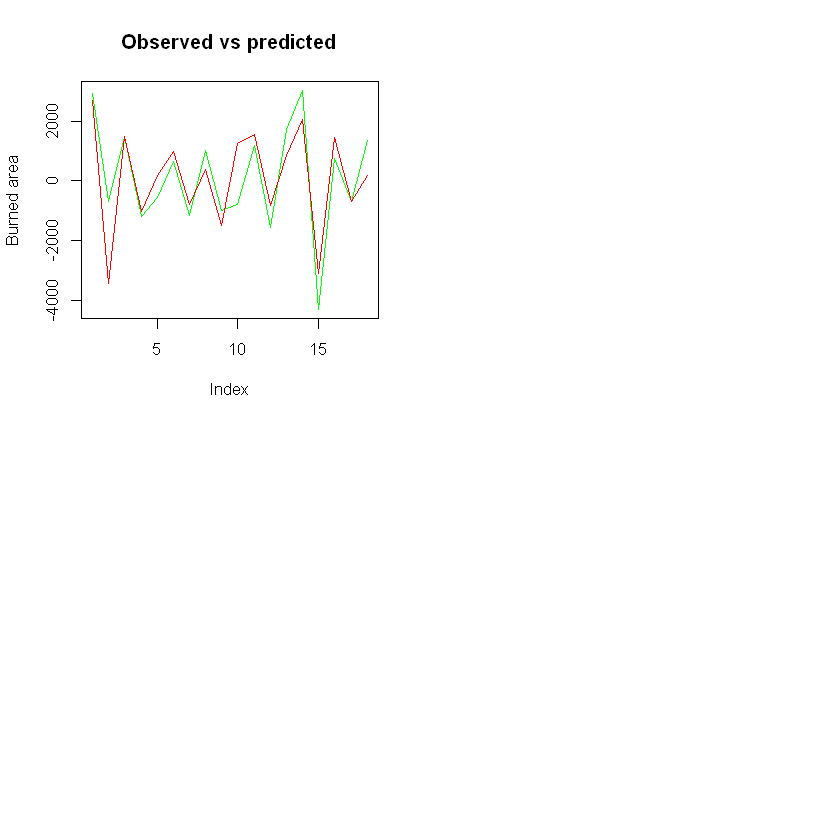

In [43]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)], corr.df.delta.3[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 1, 7, t = 3, useDeltas = T)

## Biome 4, cluster 3, 3-months persistence

        RMSE       bias      RVar cor.pvalue      cor       acc    acc.t1
cor 1079.649 -0.4600145 0.3273806   0.412944 0.205664 0.5555556 0.6666667
    acc.t2 acc.t3
cor    0.5    0.5


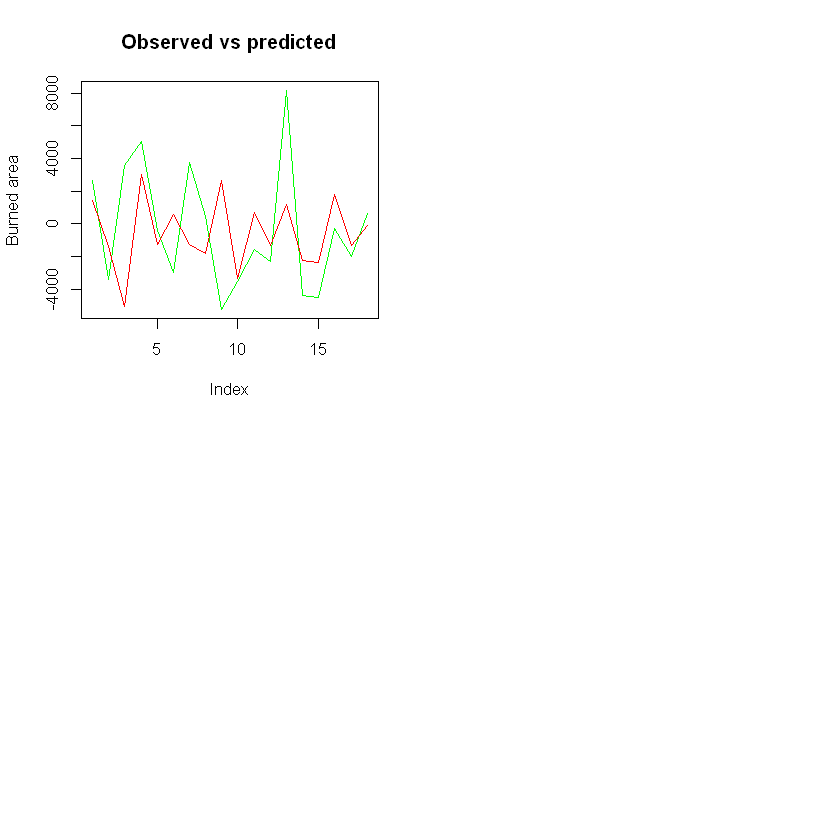

In [44]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)], corr.df.delta.3[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 4, 3, t = 3, useDeltas = T)

## Biome 12, cluster 4, 3-months persistence

This clusters includes the Iberian Peninsula

        RMSE     bias      RVar cor.pvalue       cor       acc acc.t1 acc.t2
cor 1640.413 2.227074 0.5877339  0.1063197 0.3933592 0.5555556    0.5    0.5
       acc.t3
cor 0.6666667


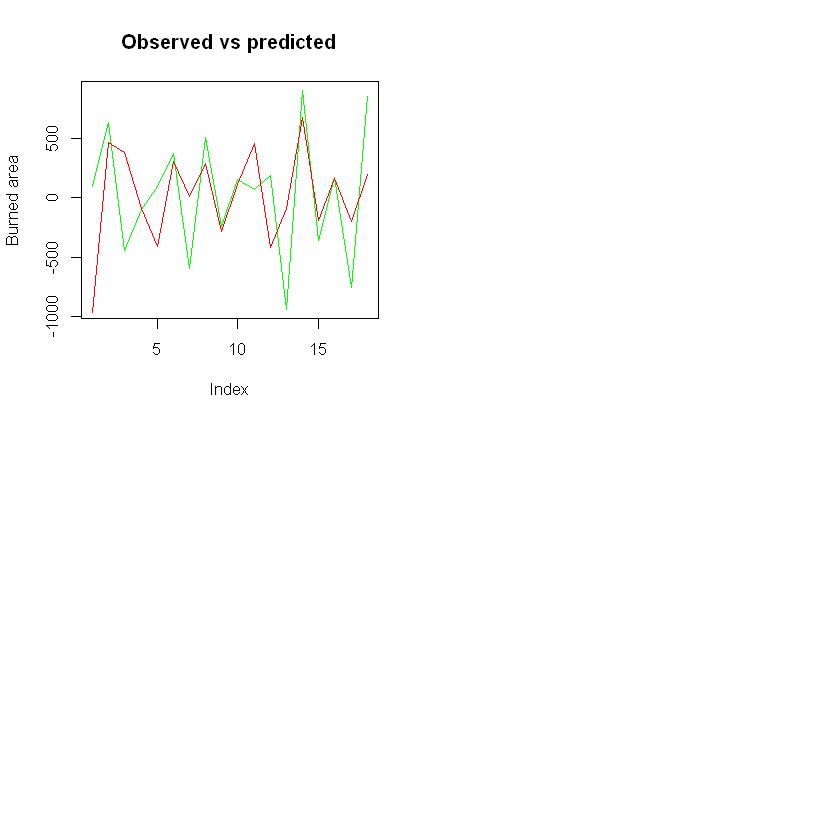

In [45]:
t = lm.clus.plot(fireSeasonPer75_def, log1p(masked_ba_series), dates, 
                  cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)], corr.df.delta.3[,-c(1,2)]), 
                  list(nina34, nao, poleur, ea, eawr, pna, scand, wp), 12, 4, t = 3, useDeltas = T)

# General results of the models

Using the models with deltas with 3-months persistence

In [77]:
load('ModelData/models_results_per_cluster_with_delta_lag3.Rdata', verbose = T)

Loading objects:
  table.deltas.Lag.3


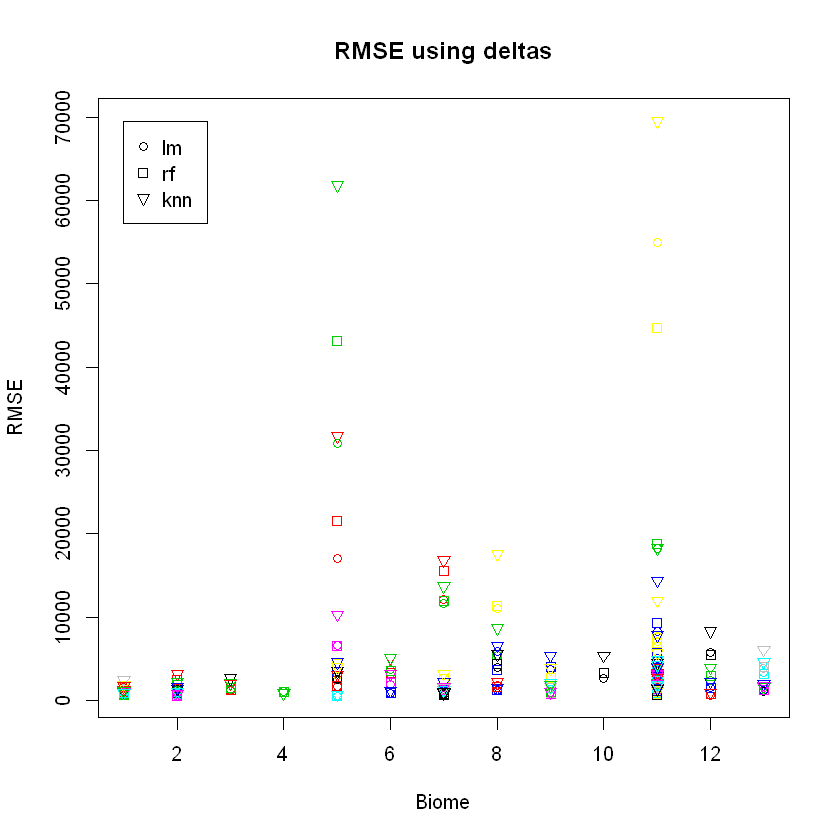

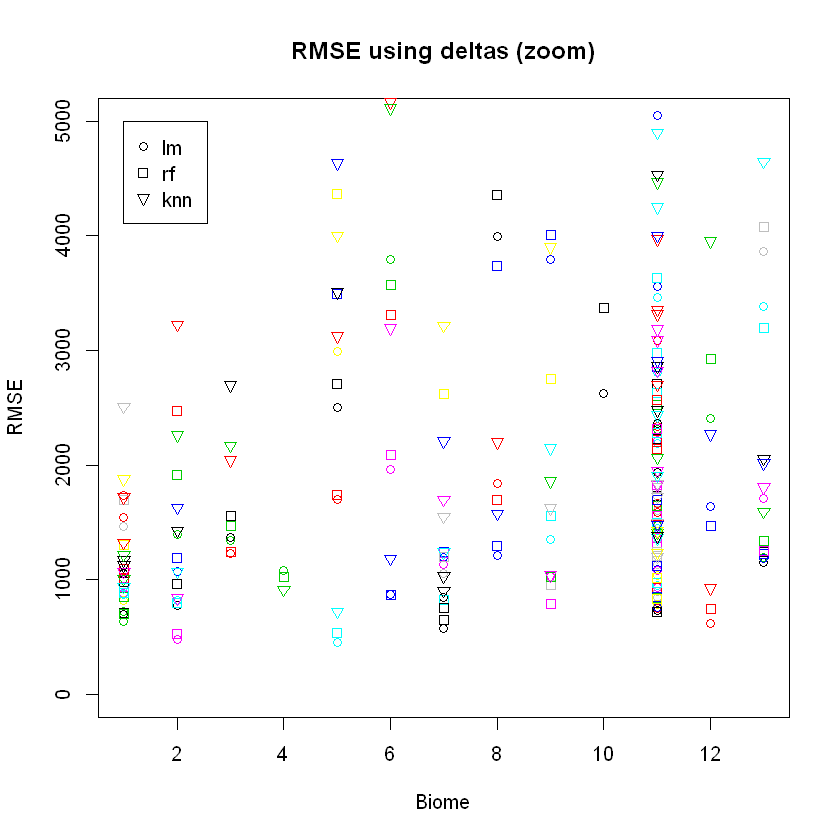

In [78]:
table <- table.deltas.Lag.3

plot(table$biome, apply(cbind(table$lm.RMSE, table$rf.RMSE, table$knn.RMSE), 1, max, T), type = 'n', xlab = 'Biome', 
     ylab = 'RMSE', main = 'RMSE using deltas')
points(table$biome, table$lm.RMSE, pch = 1, col = table$cluster)
points(table$biome, table$rf.RMSE, pch = 0, col = table$cluster)
points(table$biome, table$knn.RMSE, pch = 6, col = table$cluster)
legend(1, max(apply(cbind(table$lm.RMSE, table$rf.RMSE, table$knn.RMSE), 1, max, T), na.rm = T), legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))

plot(table$biome, c(rep(5000, length(table$biome)-1),0), type = 'n', xlab = 'Biome', 
     ylab = 'RMSE', main = 'RMSE using deltas (zoom)')
points(table$biome, table$lm.RMSE, pch = 1, col = table$cluster)
points(table$biome, table$rf.RMSE, pch = 0, col = table$cluster)
points(table$biome, table$knn.RMSE, pch = 6, col = table$cluster)
legend(1, 5000, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))

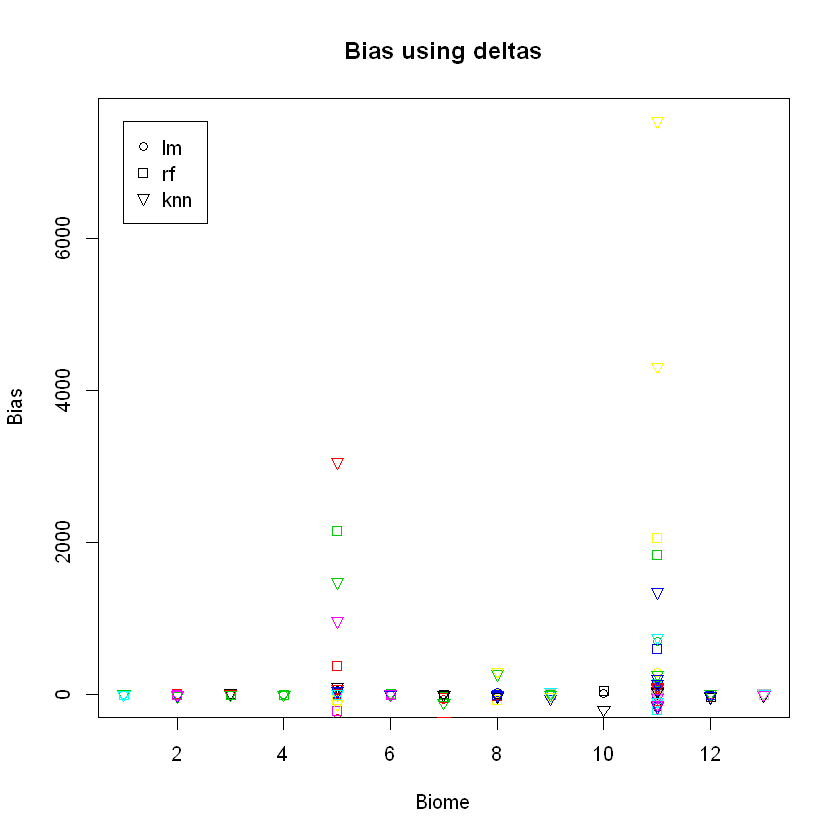

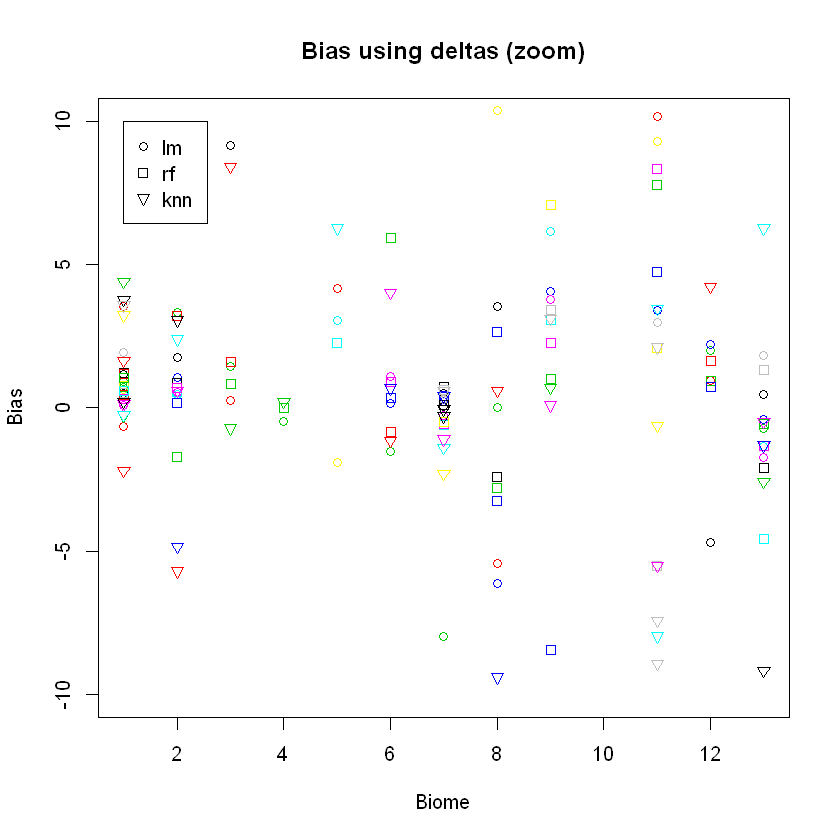

In [80]:
plot(table$biome, apply(cbind(table$lm.bias, table$rf.bias, table$knn.bias), 1, max, T), type = 'n', xlab = 'Biome', 
     ylab = 'Bias', main = 'Bias using deltas')
points(table$biome, table$lm.bias, pch = 1, col = table$cluster)
points(table$biome, table$rf.bias, pch = 0, col = table$cluster)
points(table$biome, table$knn.bias, pch = 6, col = table$cluster)
legend(1, max(apply(cbind(table$lm.bias, table$rf.bias, table$knn.bias), 1, max, T), na.rm = T), legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))

plot(table$biome, c(rep(10, length(table$biome)-1),-10), type = 'n', xlab = 'Biome', 
     ylab = 'Bias', main = 'Bias using deltas (zoom)')
points(table$biome, table$lm.bias, pch = 1, col = table$cluster)
points(table$biome, table$rf.bias, pch = 0, col = table$cluster)
points(table$biome, table$knn.bias, pch = 6, col = table$cluster)
legend(1, 10, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))

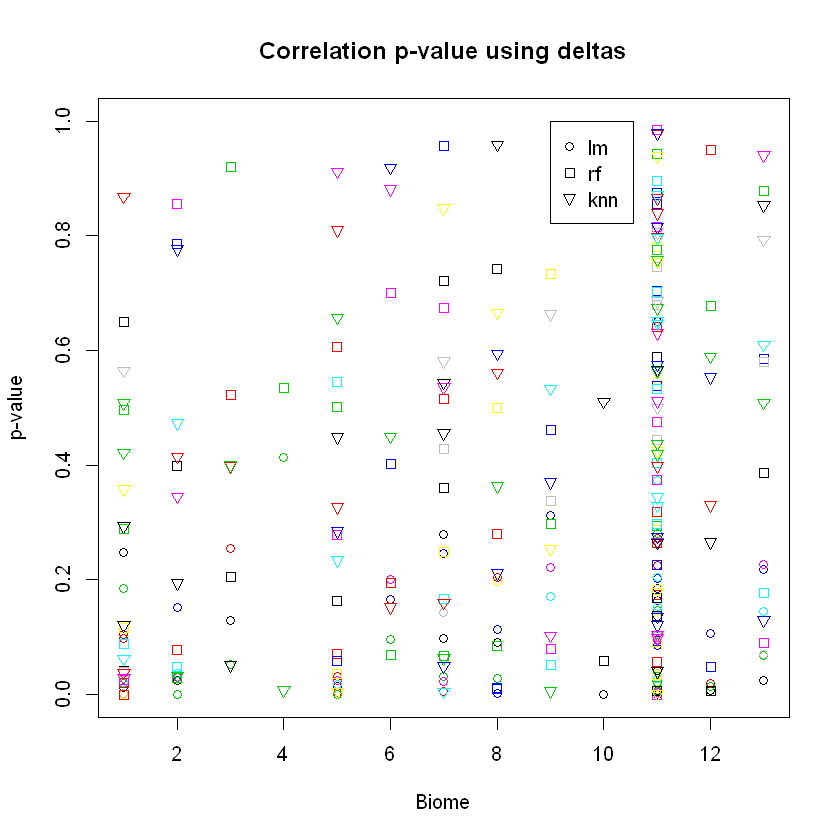

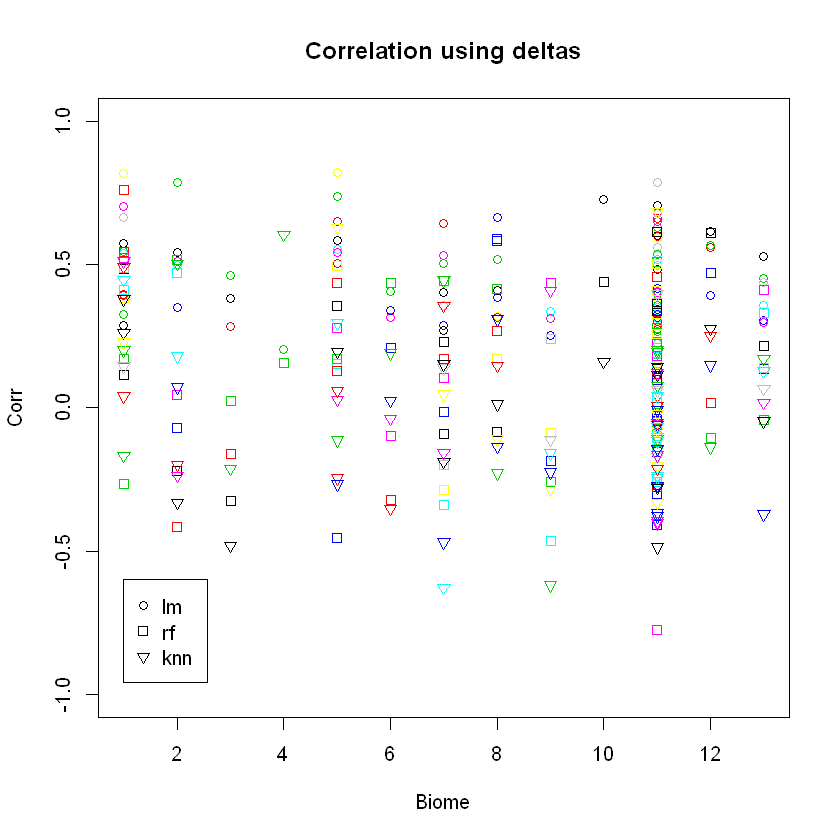

In [89]:
plot(table$biome, c(rep(1, length(table$biome)-1),0), type = 'n', xlab = 'Biome', 
     ylab = 'p-value', main = 'Correlation p-value using deltas')
points(table$biome, table$lm.cor.pvalue, pch = 1, col = table$cluster)
points(table$biome, table$rf.cor.pvalue, pch = 0, col = table$cluster)
points(table$biome, table$knn.cor.pvalue, pch = 6, col = table$cluster)
legend(9, 1, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))

plot(table$biome, c(rep(1, length(table$biome)-1),-1), type = 'n', xlab = 'Biome', 
     ylab = 'Corr', main = 'Correlation using deltas')
points(table$biome, table$lm.cor, pch = 1, col = table$cluster)
points(table$biome, table$rf.cor, pch = 0, col = table$cluster)
points(table$biome, table$knn.cor, pch = 6, col = table$cluster)
legend(1, -0.6, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))

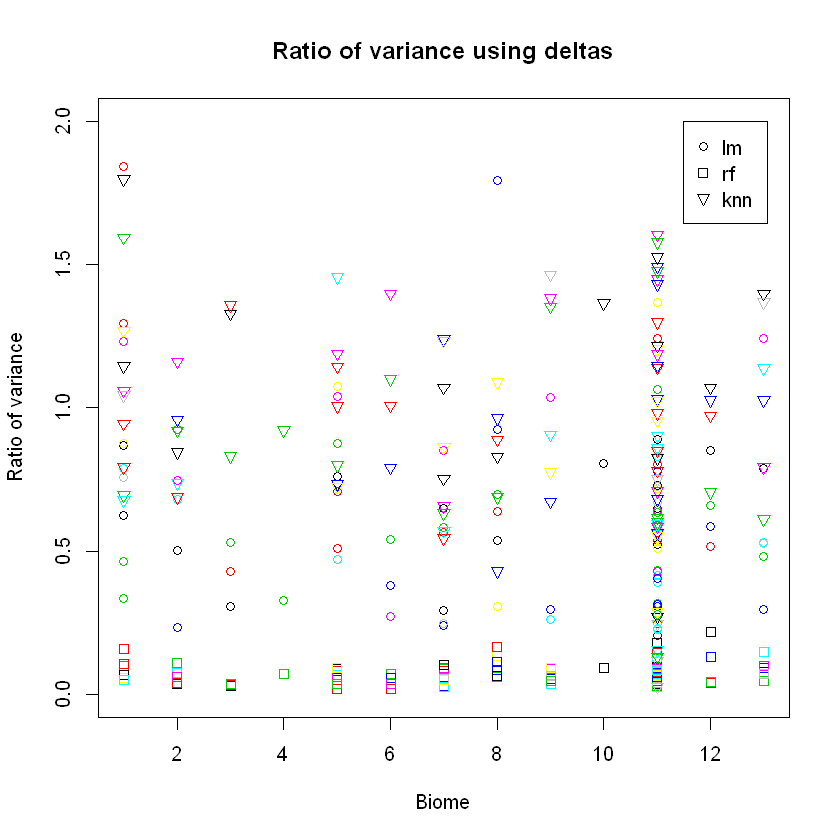

In [98]:
plot(table$biome, c(rep(2, length(table$biome)-1),0), type = 'n', xlab = 'Biome', 
     ylab = 'Ratio of variance', main = 'Ratio of variance using deltas')
points(table$biome, table$lm.RVar, pch = 1, col = table$cluster)
points(table$biome, table$rf.RVar, pch = 0, col = table$cluster)
points(table$biome, table$knn.RVar, pch = 6, col = table$cluster)
legend(11.5, 2, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))

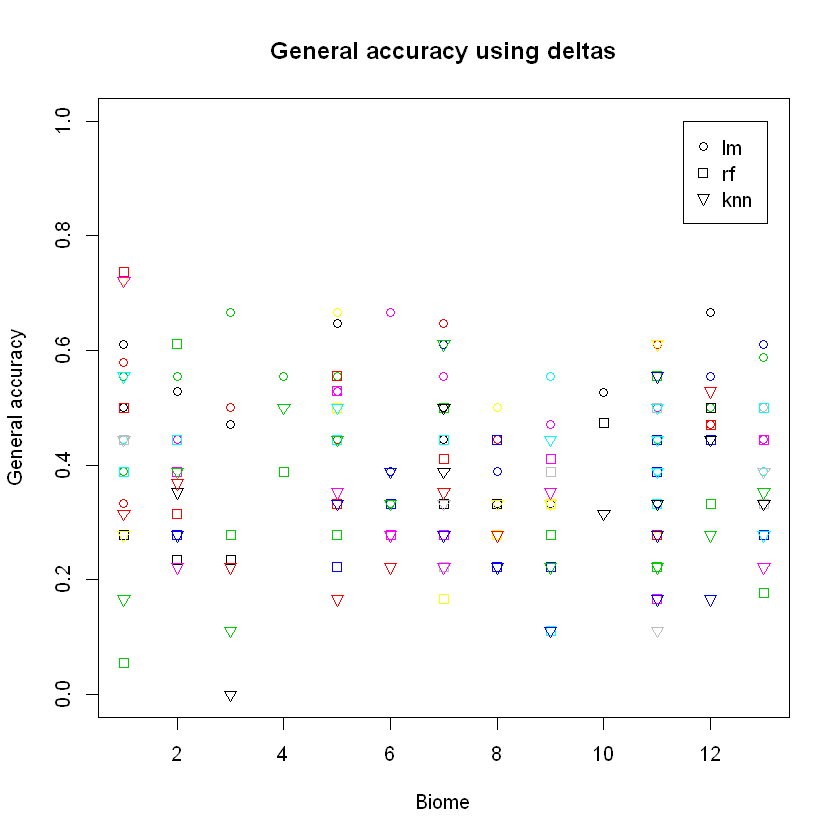

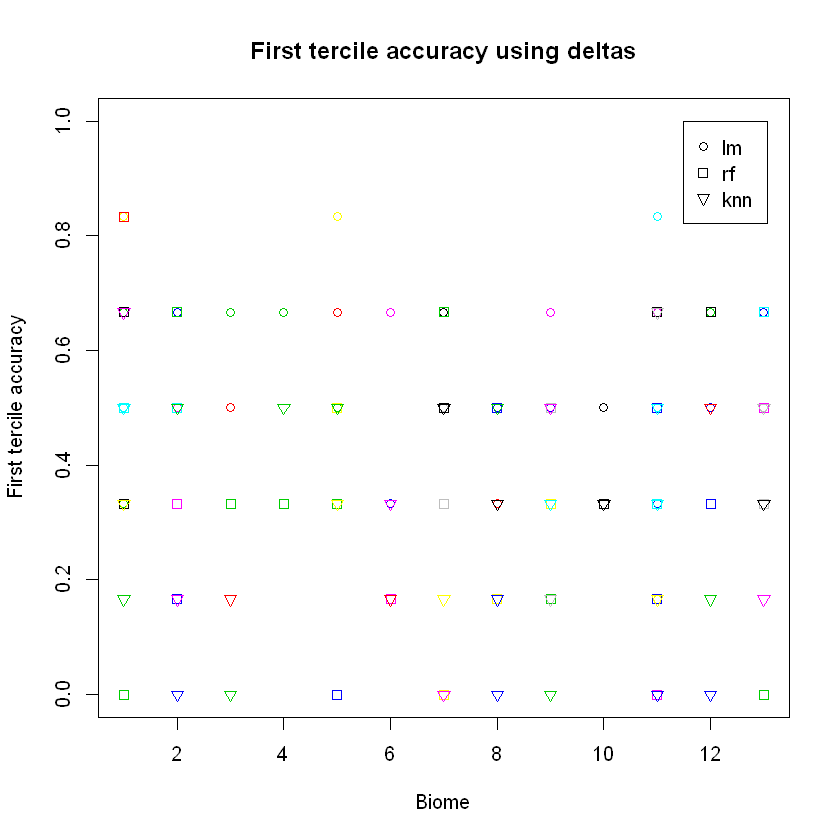

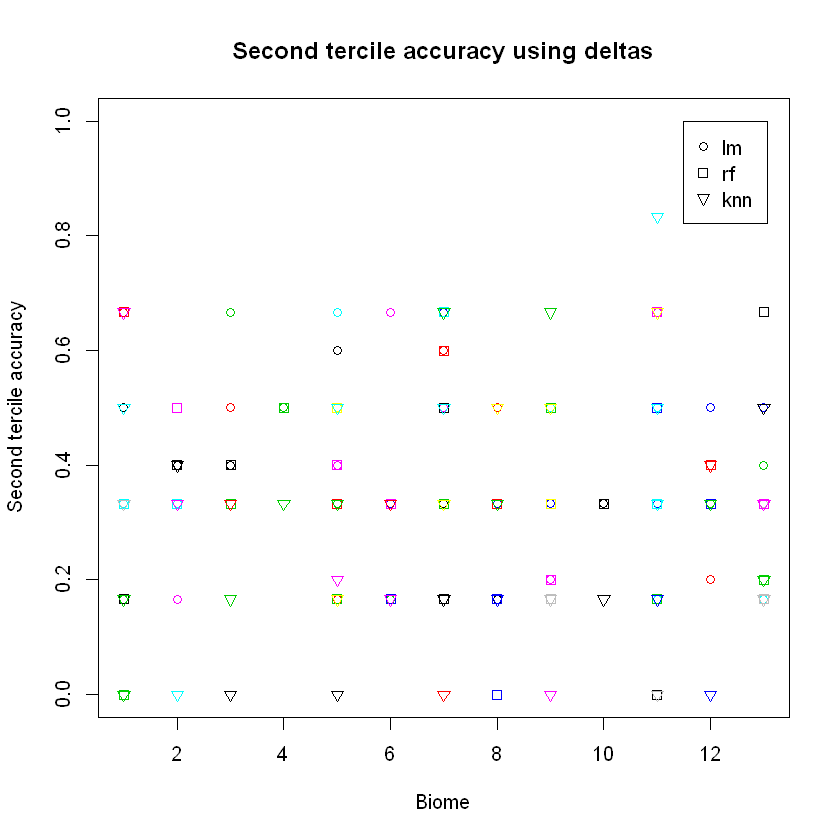

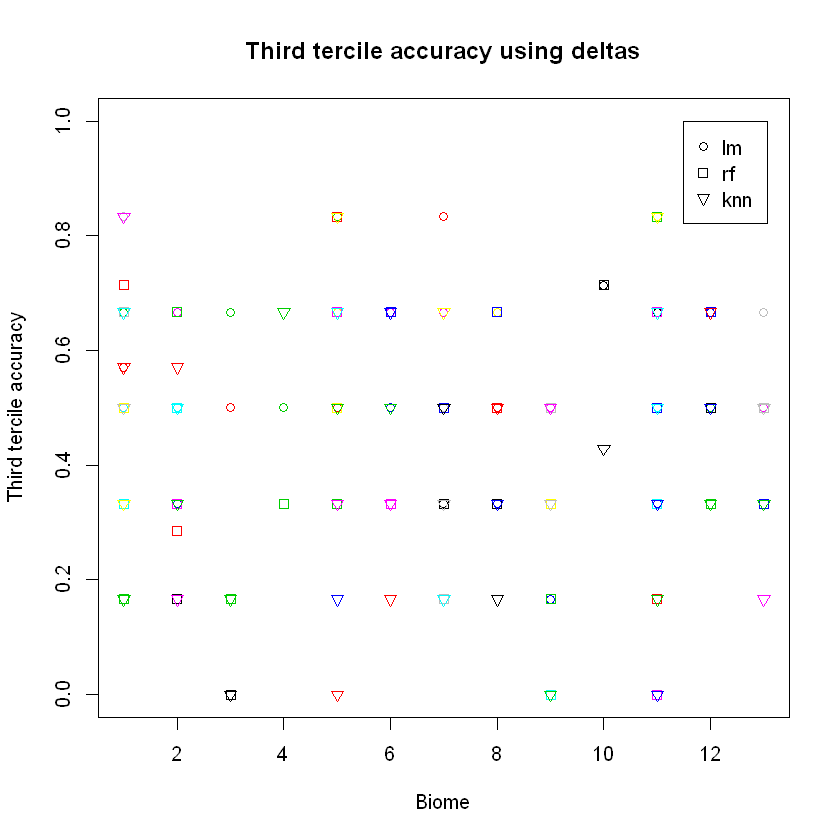

In [101]:
plot(table$biome, c(rep(1, length(table$biome)-1),0), type = 'n', xlab = 'Biome', 
     ylab = 'General accuracy', main = 'General accuracy using deltas')
points(table$biome, table$lm.acc, pch = 1, col = table$cluster)
points(table$biome, table$rf.acc, pch = 0, col = table$cluster)
points(table$biome, table$knn.acc, pch = 6, col = table$cluster)
legend(11.5, 1, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))


plot(table$biome, c(rep(1, length(table$biome)-1),0), type = 'n', xlab = 'Biome', 
     ylab = 'First tercile accuracy', main = 'First tercile accuracy using deltas')
points(table$biome, table$lm.acc.t1, pch = 1, col = table$cluster)
points(table$biome, table$rf.acc.t1, pch = 0, col = table$cluster)
points(table$biome, table$knn.acc.t1, pch = 6, col = table$cluster)
legend(11.5, 1, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))


plot(table$biome, c(rep(1, length(table$biome)-1),0), type = 'n', xlab = 'Biome', 
     ylab = 'Second tercile accuracy', main = 'Second tercile accuracy using deltas')
points(table$biome, table$lm.acc.t2, pch = 1, col = table$cluster)
points(table$biome, table$rf.acc.t2, pch = 0, col = table$cluster)
points(table$biome, table$knn.acc.t2, pch = 6, col = table$cluster)
legend(11.5, 1, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))


plot(table$biome, c(rep(1, length(table$biome)-1),0), type = 'n', xlab = 'Biome', 
     ylab = 'Third tercile accuracy', main = 'Third tercile accuracy using deltas')
points(table$biome, table$lm.acc.t3, pch = 1, col = table$cluster)
points(table$biome, table$rf.acc.t3, pch = 0, col = table$cluster)
points(table$biome, table$knn.acc.t3, pch = 6, col = table$cluster)
legend(11.5, 1, legend=c("lm", "rf", "knn"),
       pch=c(1, 0, 6))